In [45]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.dpi'] = 150

import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})

import seaborn as sns
sns.set(style='whitegrid', font_scale=0.9, rc={'lines.linewidth': 1.4,
                                               'lines.markersize': 1.6}, font='serif')

# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style(theme='oceans16')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
#jtplot.style(context='notebook', fscale=1, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size

In [46]:
import glob
import numpy as np
from maszcal.data.sims import NBatta2010

In [100]:
nbatta_sims_1h = NBatta2010('../data/NBatta2010/').cut_radii(0.125, 5)
nbatta_sims_2h = NBatta2010('../data/NBatta2010/').cut_radii(0.1, 12)
zs = nbatta_sims_1h.redshifts

rs_1h = nbatta_sims_1h.radii
rs_2h = nbatta_sims_2h.radii

In [80]:
DATA_DIR = '../data/NBatta2010/single-mass-bin-fits/'


def get_file(slug):
    return glob.glob(DATA_DIR + slug + '*.npy')

In [81]:
cat ../data/NBatta2010/single-mass-bin-fits/nfw-free-c-emulator-errors_redshift-0.05562733821455401_bin-13_2020-12-01-171443.header.txt

# PARAM_MINS = [27.63102112  1.        ]
# PARAM_MAXES = [36.61821794  6.        ]
# LOWER_RADIUS_CUT = 0.125
# UPPER_RADIUS_CUT = 5
# SAMPLE_SEED = 13
# 


In [82]:
get_file('2halo-bary-free-c*best-fit*')

['../data/NBatta2010/single-mass-bin-fits/2halo-bary-free-c_best-fit_2020-12-01-183705.npy',
 '../data/NBatta2010/single-mass-bin-fits/2halo-bary-free-c_best-fit_2020-12-01-231719.npy']

In [83]:
nfw_files = get_file('nfw-free-c*emulator*12-01-171443*')
bary_files = get_file('bary-free-c*emulator*12-01-171757*')
twohalo_nfw_files = get_file('2halo*nfw-free-c*emulator*12-01-173211*')
twohalo_bary_files = get_file('2halo*bary-free-c*emulator*12-01-183705*')

In [84]:
N_ERRORCHECK = 1000

def load_errors(file_list, num_radii):
    errors = np.zeros((zs.size, num_radii, N_ERRORCHECK))
    for i, f in enumerate(file_list):
        errors[i, :, :] = np.load(f)
    return errors

In [86]:
nfw_errs = load_errors(nfw_files, nbatta_sims_1h.radii.size)
bary_errs = load_errors(bary_files, nbatta_sims_1h.radii.size)
twohalo_nfw_errs = load_errors(twohalo_nfw_files, nbatta_sims_2h.radii.size)
twohalo_bary_errs = load_errors(twohalo_bary_files, nbatta_sims_2h.radii.size)

In [89]:
errs_list = [nfw_errs, bary_errs, twohalo_nfw_errs, twohalo_bary_errs]
errs_names = ['nfw_errs', 'bary_errs', 'twohalo_nfw_errs', 'twohalo_bary_errs']

In [91]:
for i, errs in enumerate(errs_list):
    print(f'{errs_names[i]}: {100*np.abs(errs).mean()}')

nfw_errs: 0.26101377280853316
bary_errs: 1.3173237253497214
twohalo_nfw_errs: 0.8690069252517
twohalo_bary_errs: 2.44170529056661


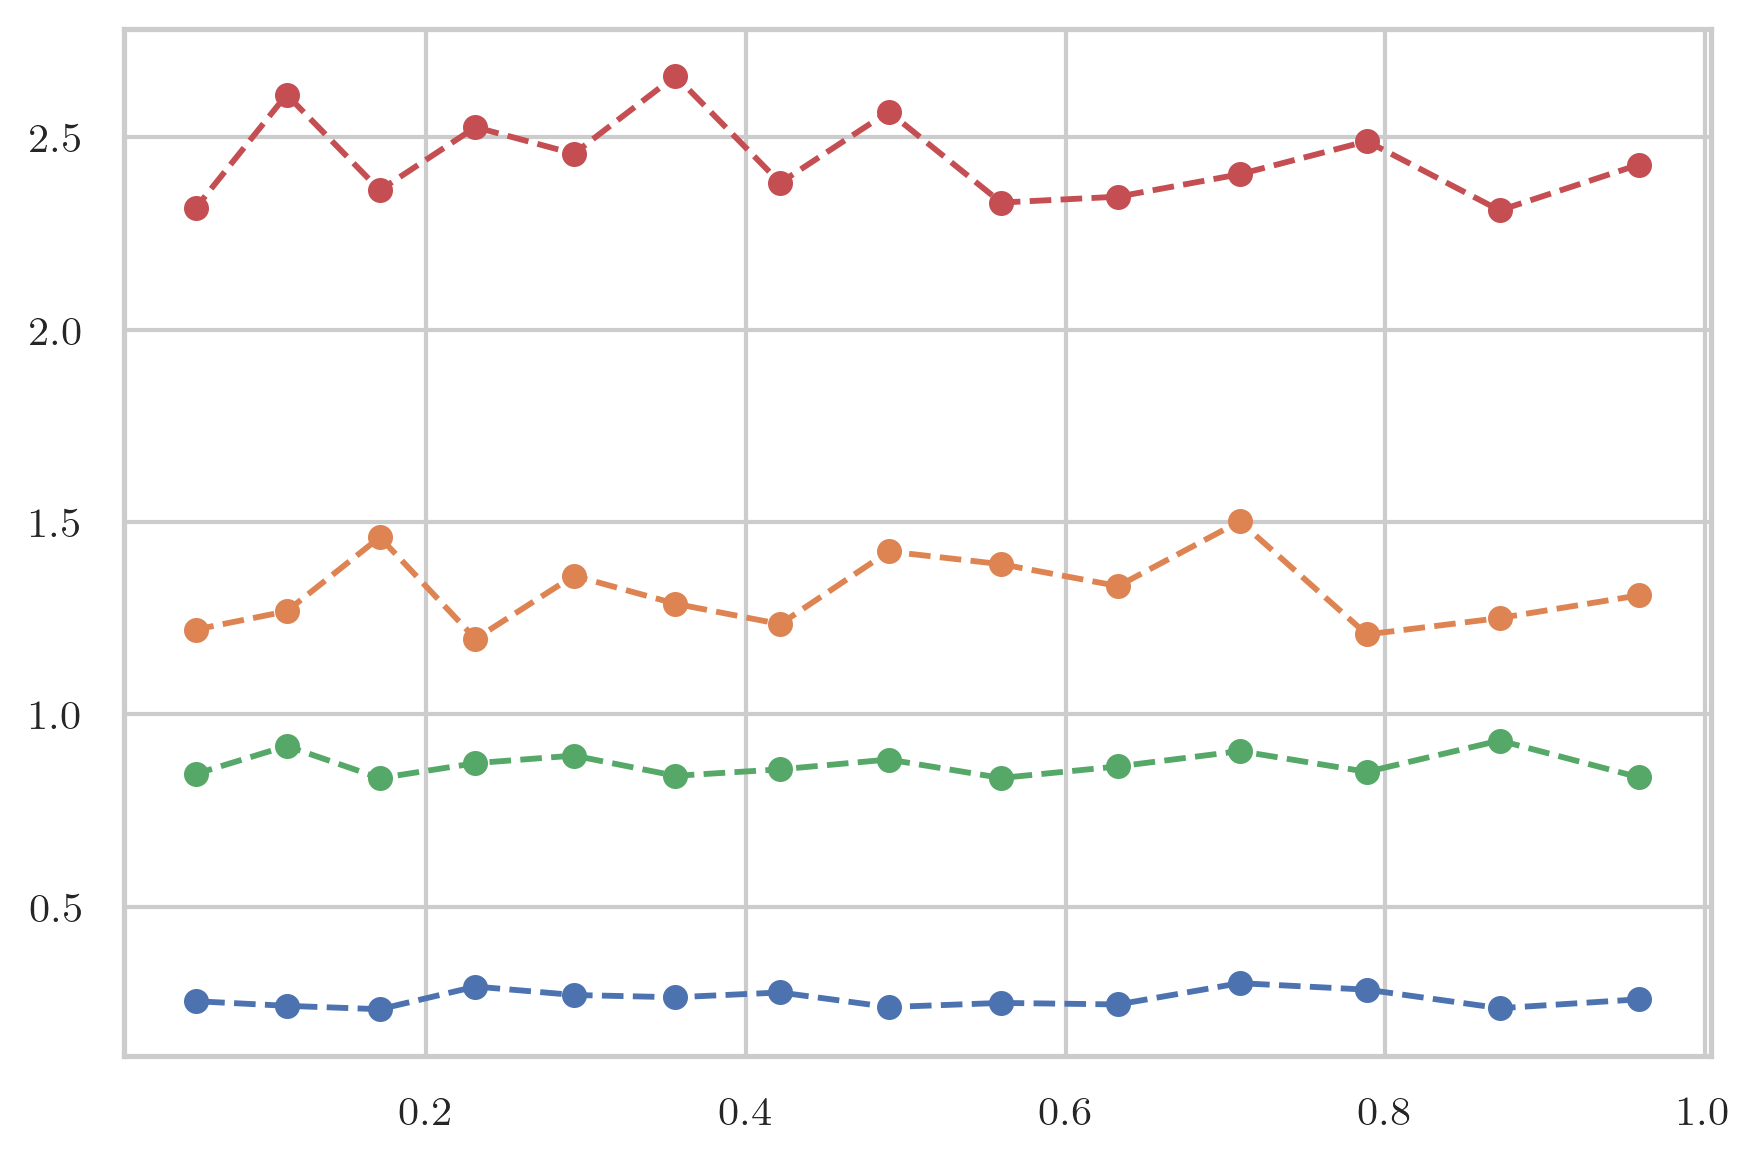

In [99]:
plt.plot(zs, 100*np.abs(nfw_errs).mean(axis=(1, 2)), marker='o', linestyle='--', markersize=5)
plt.plot(zs, 100*np.abs(bary_errs).mean(axis=(1, 2)), marker='o', linestyle='--', markersize=5)
plt.plot(zs, 100*np.abs(twohalo_nfw_errs).mean(axis=(1, 2)), marker='o', linestyle='--', markersize=5)
plt.plot(zs, 100*np.abs(twohalo_bary_errs).mean(axis=(1, 2)), marker='o', linestyle='--', markersize=5)
pass

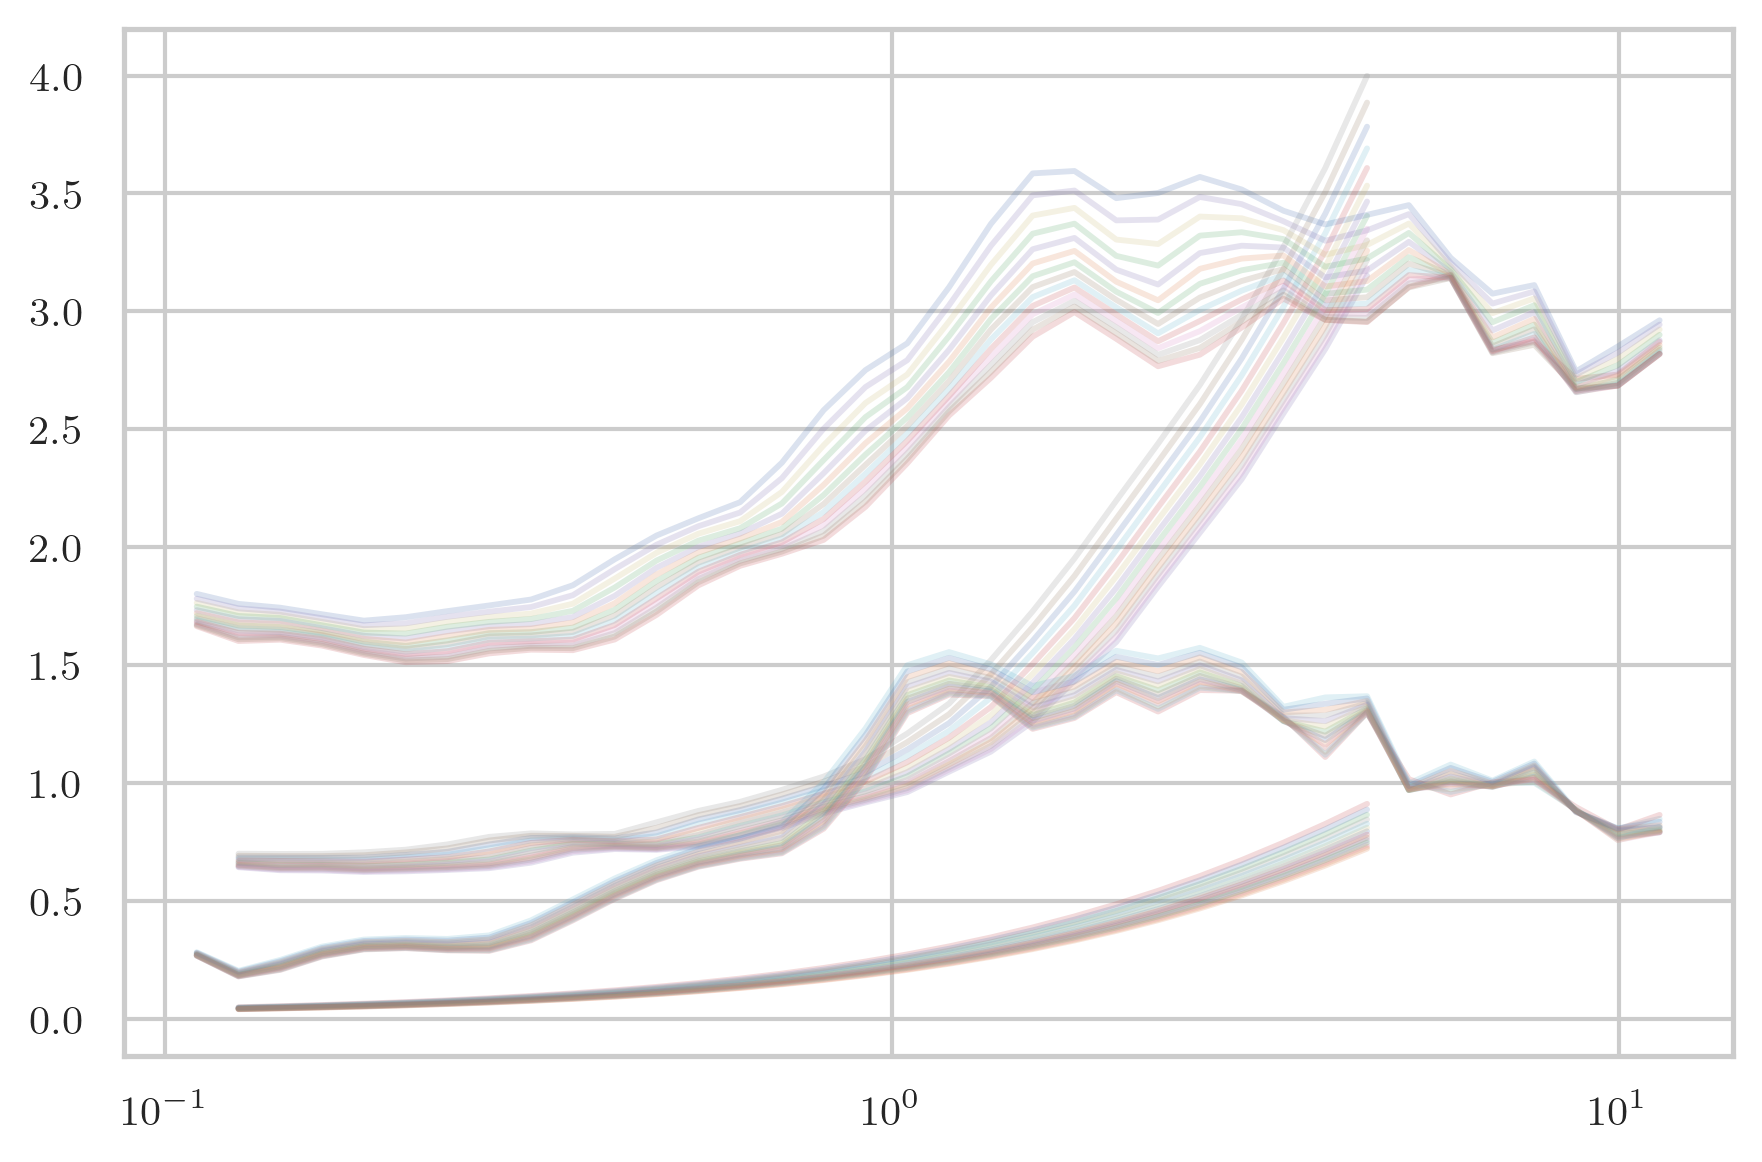

In [107]:
plt.plot(rs_1h, 100*np.abs(nfw_errs).mean(axis=(2)).T, alpha=0.2)
plt.plot(rs_1h, 100*np.abs(bary_errs).mean(axis=(2)).T, alpha=0.2)
plt.plot(rs_2h, 100*np.abs(twohalo_nfw_errs).mean(axis=(2)).T, alpha=0.2)
plt.plot(rs_2h, 100*np.abs(twohalo_bary_errs).mean(axis=(2)).T, alpha=0.2)
plt.xscale('log')
pass

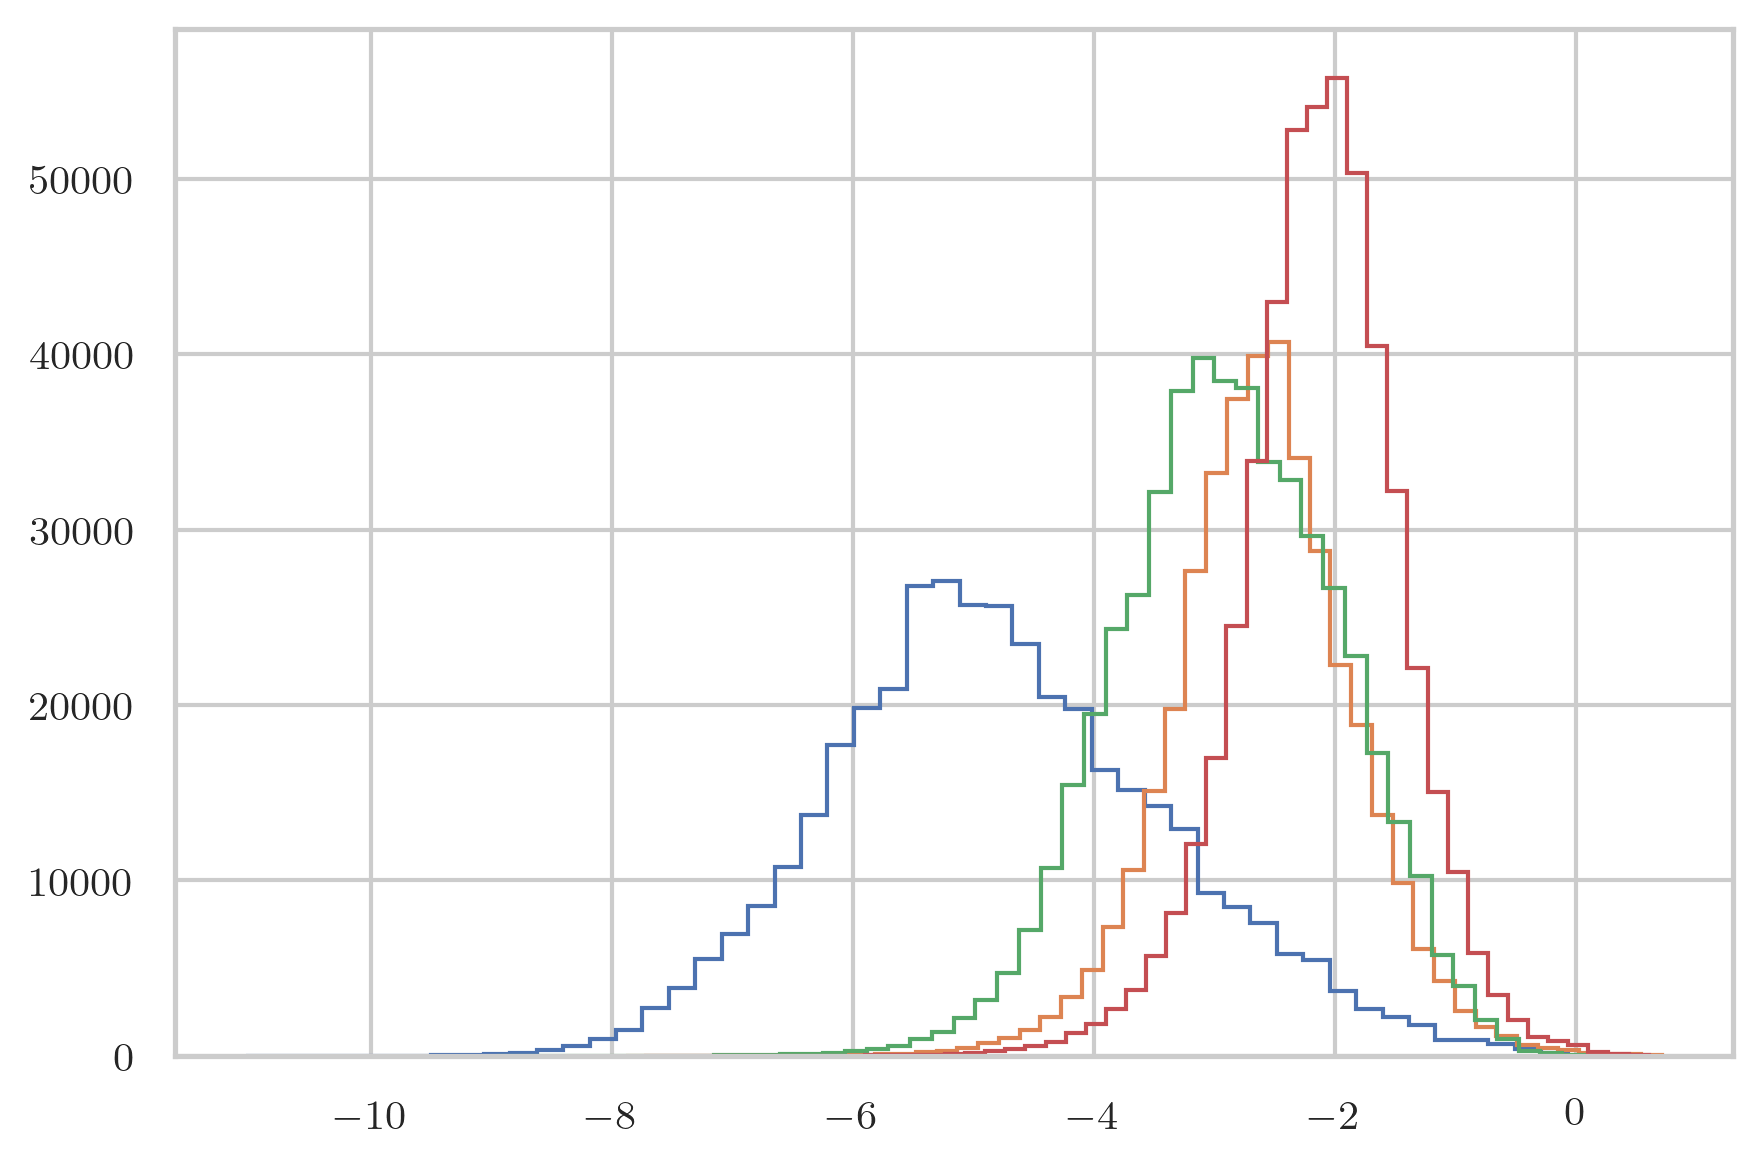

In [113]:
plt.hist(np.log10(np.abs(nfw_errs.flatten())), bins=50, histtype='step')
plt.hist(np.log10(np.abs(bary_errs.flatten())), bins=50, histtype='step')
plt.hist(np.log10(np.abs(twohalo_nfw_errs.flatten())), bins=50, histtype='step')
plt.hist(np.log10(np.abs(twohalo_bary_errs.flatten())), bins=50, histtype='step')
pass